## Background

My main focus for this capstone project is to apply and enhance my data science skills from the `Springboard` data scientist career track by predicting total sales for every product and store by analyzing several time-series datasets consisting of daily sales data from `1C Company`, one of the largest Russian software firms.

#### About 1C Software Company 

1C is an enterprise software company with integrated systems and programs intended for automation of daily enterprise activities. For instances, 1C provide solutions for various business tasks of economic and management activity including management and business accounting, human resources management, customer relationship management, supplier relationship management, material requirements planning, and other similar solutions. 

#### Objective

The main goal of this capstone is to use several time-series datasets to predict the total sales for every product and store in the next month. 
I hope the business intelligence and data science expertise I will learn and hone in this capstone will enhance my skills to be able to help future clients who might have similar structures and/or have similar goals of future sales prediction as 1C. 

#### Initial EDA

In [1]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as scs
%matplotlib inline
pd.set_option('max_columns', 100)

# Load datasets 
item_categories = pd.read_csv('/Users/kaizen/Data Science/Capstone 2/Competition Data/item_categories.csv', index_col=False)
items = pd.read_csv('/Users/kaizen/Data Science/Capstone 2/Competition Data/items.csv', index_col=False)
sales = pd.read_csv('/Users/kaizen/Data Science/Capstone 2/Competition Data/sales_train.csv', index_col=False)
test = pd.read_csv('/Users/kaizen/Data Science/Capstone 2/Competition Data/test.csv', index_col=False)
shops = pd.read_csv('/Users/kaizen/Data Science/Capstone 2/Competition Data/shops.csv', index_col=False)

In [2]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [3]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
item_category_name    84 non-null object
item_category_id      84 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [4]:
item_categories.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [5]:
sorted(item_categories['item_category_id'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83]

There are 84 unique item categories ranging from 0 to 83 and their names are in Russian

In [6]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [7]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
item_name           22170 non-null object
item_id             22170 non-null int64
item_category_id    22170 non-null int64
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [8]:
items.tail(5)

,item_name,item_id,item_category_id
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62
22169,Яйцо дракона (Игра престолов),22169,69


In [9]:
items.item_category_id.unique()

array([40, 76, 55, 19, 30, 23, 37, 41, 57, 43, 78, 54, 49, 44, 45, 77, 73,
       31, 75, 58, 56, 38, 67, 59, 60, 74, 21, 28, 20, 24, 29, 70, 22, 32,
       62, 25, 72,  4, 63, 27, 18, 26, 64, 15, 68,  0,  2,  5,  1,  3,  6,
       35, 65, 14, 13, 10, 11, 12, 48, 71, 69,  7, 33, 34, 16, 66, 39, 52,
       46, 42, 61,  8, 80,  9, 17, 36, 47, 82, 81, 50, 51, 79, 53, 83])

There are 22,170 items in total within the 84 different item categories 

In [10]:
sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [12]:
test.head(2)

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
ID         214200 non-null int64
shop_id    214200 non-null int64
item_id    214200 non-null int64
dtypes: int64(3)
memory usage: 4.9 MB


In [14]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


In [15]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
shop_name    60 non-null object
shop_id      60 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


After our exploratory data analysis above, a few initial things we see include our data containing items, item categories names, and shop names in Russian; the date is in the date-month-year format and it is not currently a datetime object;  

In [16]:
sales.date_block_num.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [17]:
sales.tail(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


We observe above that there are 2,935,849 items sold within the 60 shops of the company for 34 consecutive months (date_block_num). 

In [18]:
# Ensure all data in shop and items in the test set is also in the training set
test_shops = test.shop_id.unique()
train = sales[sales.shop_id.isin(test_shops)]
test_items = test.item_id.unique()
train = sales[sales.item_id.isin(test_items)]

In [19]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [20]:
sales2 = sales.copy()
sales2.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [21]:
# Reformat date column of our sales data 
import datetime
sales2.date=sales2.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))
sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [22]:
sales2.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0


In [23]:
sales.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [24]:
# Merge data to monthly intervals to predict future sales next month
monthly_sales=sales2.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],
    "item_price":"mean","item_cnt_day":"sum"})

We format our data to a multiindex using groupby so that the date_block_number(or month intervals), shop_id, and item_id are in the index. Then for our monthly sales dataframe's columns, we use aggregation to show the monthly intervals by date, with the average monthly sales price for each corresponding items, and the sum of items sold that month. 

In [25]:
monthly_sales.head(20)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-01-10 2013-01-10      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-01-06 2013-01-06      193.0          1.0
                       96      2013-01-10 2013-01-10       70.0          1.0
                       98      2013-01-04 2013-01-31      268.0         25.0
                       111     2013-01-17 2013-01-17       89.0          1.0
                       149     2013-01-11 2013-01-28       99.0          3.0
                       151     2013-01-16 2013-01-16       75.0          1.0
                       153     2013-01-09 2013-01-09      258.0          1.0
                       198     2013-01-10 2013-01-10      112.0          1.0
                       210     2013-01-05 2013-01-25      118.0          2.0
                       282     2013-01-04 2013-01-04      109.0          1.0
                       306     2013-01-22 2013-01-22       59.0          1.0
                       351     2013-01-21 2013-01-21       89.0          1.0

In [26]:
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1609124 entries, (0, 0, 32) to (33, 59, 22102)
Data columns (total 4 columns):
(date, min)            1609124 non-null datetime64[ns]
(date, max)            1609124 non-null datetime64[ns]
(item_price, mean)     1609124 non-null float64
(item_cnt_day, sum)    1609124 non-null float64
dtypes: datetime64[ns](2), float64(2)
memory usage: 55.4 MB


In [27]:
# Remove scientific notation and show summary stats for monthly_sales
pd.options.display.float_format = '{:.2f}'.format
monthly_sales.describe()

,item_price,item_cnt_day
,mean,sum
count,1609124.00,1609124.00
mean,790.88,2.27
std,1551.61,8.65
min,0.09,-22.00
25%,199.00,1.00
50%,399.00,1.00
75%,898.50,2.00
max,307980.00,2253.00


#### Visual EDA

    item_category_id   item_id
0                 40  72210206
1                 37  25727760
2                 55  22265404
3                 72  13323178
4                 61  11617191
5                 31   7544378
6                 43   6349378
7                 30   5989227
8                 58   5612126
9                 57   5527258
10                63   5429035
11                69   4796901
12                41   4675033
13                38   4623499
14                64   3916658
15                62   3651448
16                19   3536428
17                67   3124141
18                70   2649656
19                23   2548805
20                66   2423633
21                49   2248783
22                59   2231688
23                65   2118059
24                47   2034803
25                76   1919109
26                75   1688089
27                56   1667005
28                28   1459524
29                78   1445572
..               ...       ...
54      

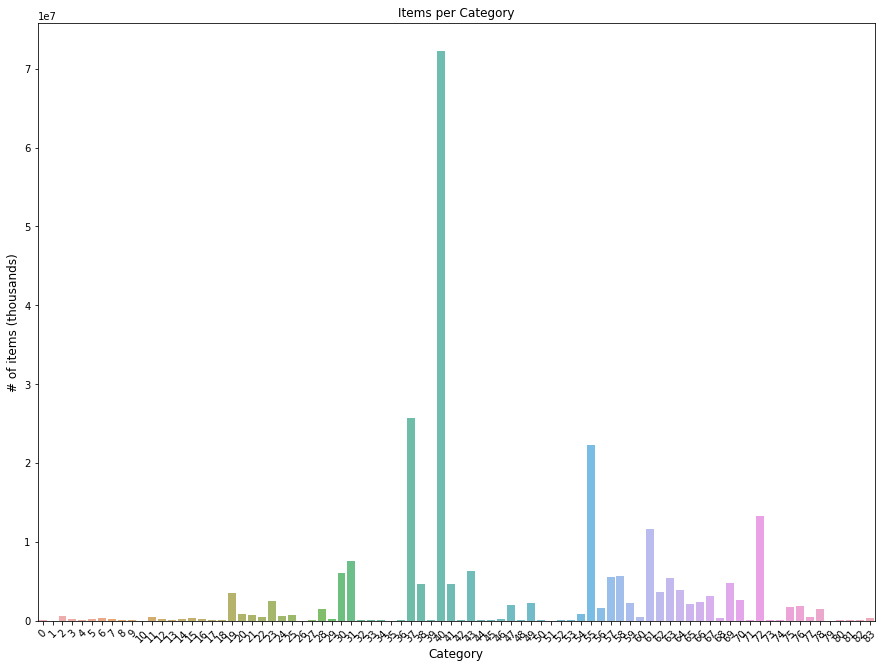

In [28]:
# Plot the number of items for each category  
x=items.groupby(['item_category_id']).sum()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[:].reset_index()
print(x)

# plot
plt.figure(figsize=(15,11))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.xticks(rotation=45)
plt.title("Items per Category")
plt.ylabel('# of items (thousands)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

We see here the number of items for each of all the 84 item categories

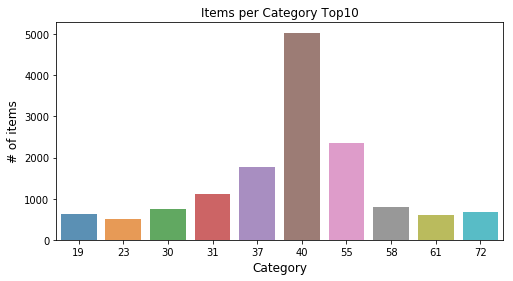

In [42]:
# number of items per cat 
x=items.groupby(['item_category_id']).count()
x=x.sort_values(by='item_id',ascending=False)
x=x.iloc[0:10].reset_index()
x
# #plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.item_category_id, x.item_id, alpha=0.8)
plt.title("Items per Category Top10")
plt.ylabel('# of items', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

We see in the above plot the top 10 most sold item categories

Since our goal is to predict futures sales for the next month using a store-item combination, sales over time of each combination is in a `time-series`, so we can gain some insights by first computing and plotting the total sales per month for the entire company as a function of time before diving into each shop and item. 

In [30]:
sales2.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.00
1,2013-01-03,0,25,2552,899.00,1.00


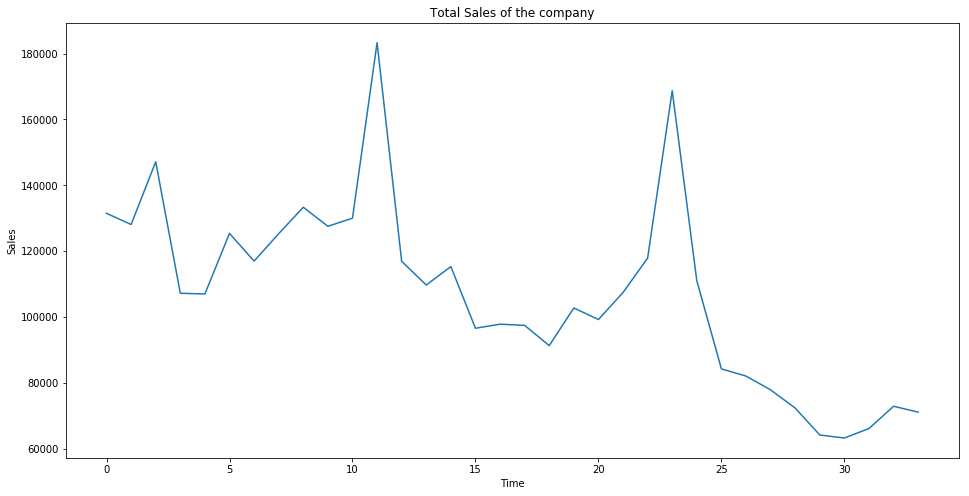

In [31]:
# Plot Total Sales
ts=sales2.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.show()

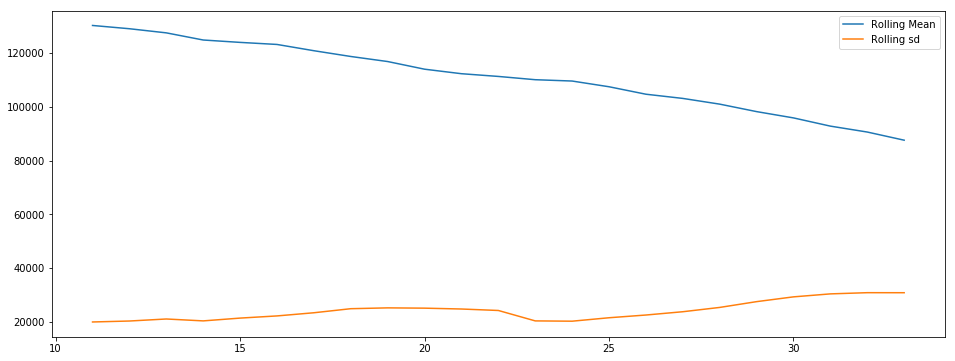

In [32]:
# Plot the rolling average of total sales
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

We observe that within the 34 months of our collected sales data, total sales have an `OVERALL DECREASING TREND` and that the peaks and valleys indicate a seasonal sales cycle with higher sales during the holiday season every November and December, which indicates that our future sales prediction should increase as it approaches month 35 and 36. 

Therefore, we can reasonably hypothesize that our prediction for the total sales for every product and store in the next month should follow this pattern and be higher than its preceding months but its peak should be lower than the peaks in month 11 (highest in 2013) and month 22 (second highest).

#### Shop and Items EDA

After the total sales trend graphs, we will now proceed to examine the data at a more granular level by looking at the trends for each of the 60 shops and 84 item categories.

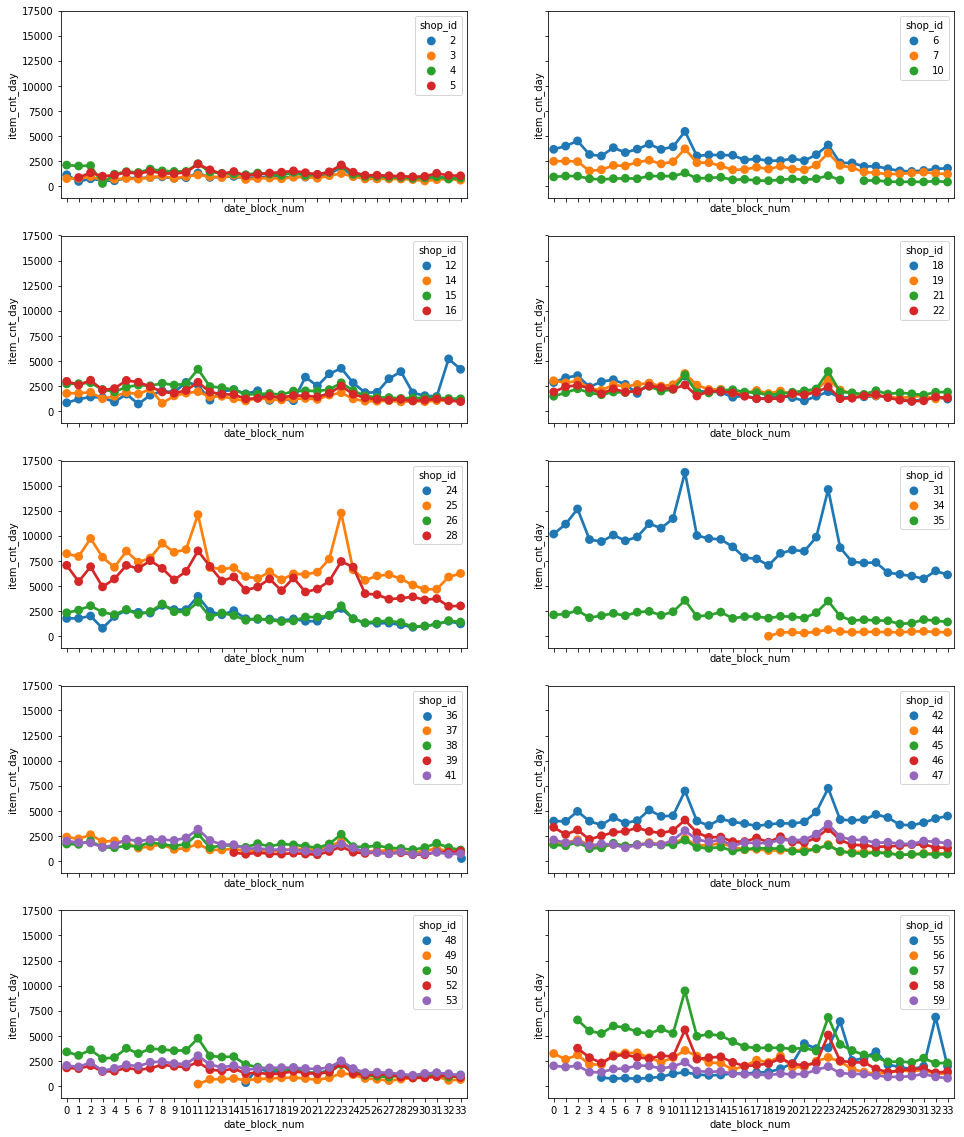

In [33]:
# Plot the amount of daily items sold for shops 0-59 as a function of time over all 34 months (date_block_num)
from math import ceil
test_shops = test.shop_id.unique()
train = sales[sales.shop_id.isin(test_shops)]
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

We see above that generally, most stores actually have a fairly constant trend with a few exceptions such as shop 25, 28, 31, and 55-58 with a similar seasonal trend as our previous total sales for the entire company. Furthermore, since there are close to three million items, we will skip the tedious task of looking at the trends for each item and just focus on the monthly and yearly trends for each of the 84 item categories. 

In [34]:
# Plot the time-series trends for each item category
train = train.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()
train.head(2)

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id
0,1,04.04.2014,15,55,4490.00,1.00,76
1,1,02.04.2014,15,55,4490.00,1.00,76


In [35]:
# Add month and year categories 
train['month'] = train.date.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train['year'] = train.date.apply(lambda x: datetime.datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))

In [36]:
train.head(2)

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,item_category_id,month,year
0,1,04.04.2014,15,55,4490.00,1.00,76,04,2014
1,1,02.04.2014,15,55,4490.00,1.00,76,04,2014


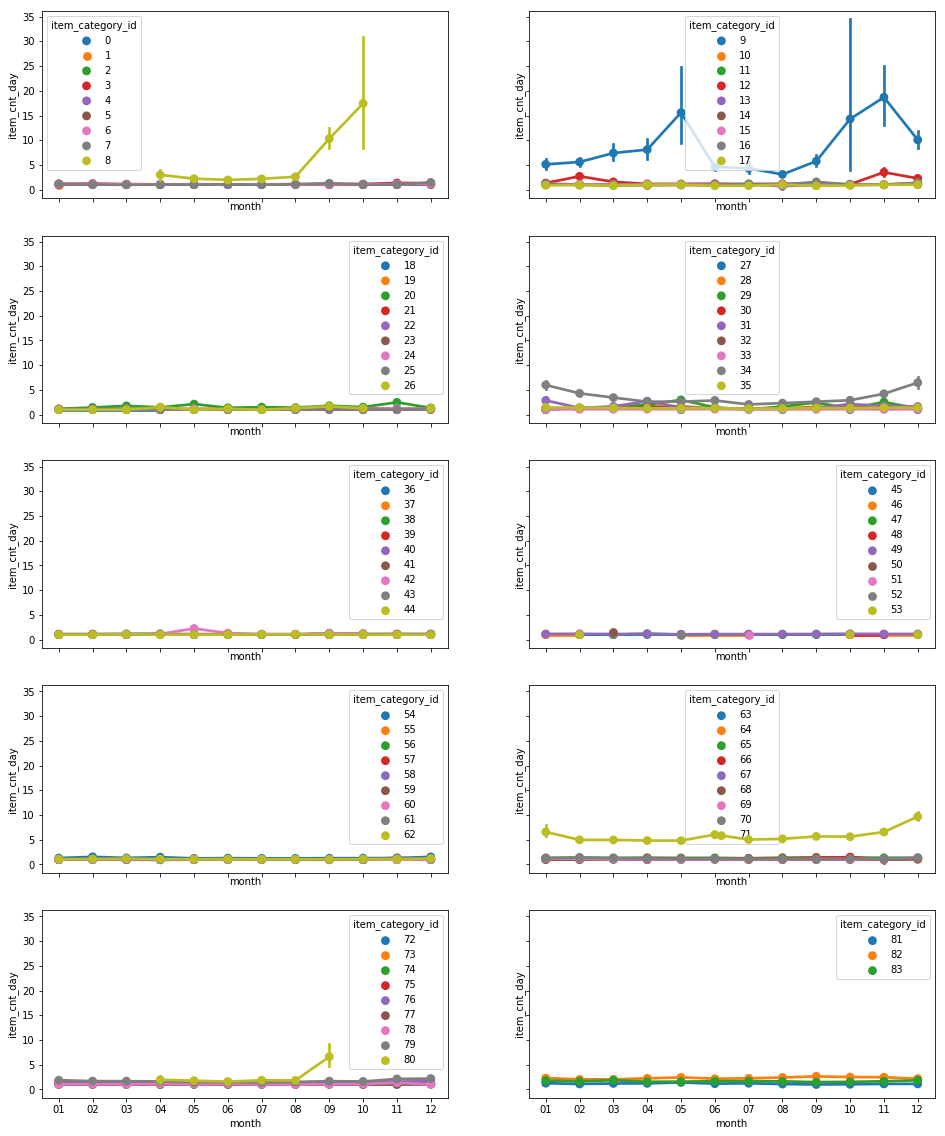

In [37]:
# Visualize plots
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(train.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='month', y='item_cnt_day', hue='item_category_id', 
                      data=train[np.logical_and(count*id_per_graph <= train['item_category_id'], train['item_category_id'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j])
        count += 1

We recognize from the display above that only a few categories such as 8, 9 and 71 do better overall and vary significantly on a monthly basis in all 34 months while most other categories have constant monthly sales. Below, we will plot the trends of sales for all 34 months for each item category. 

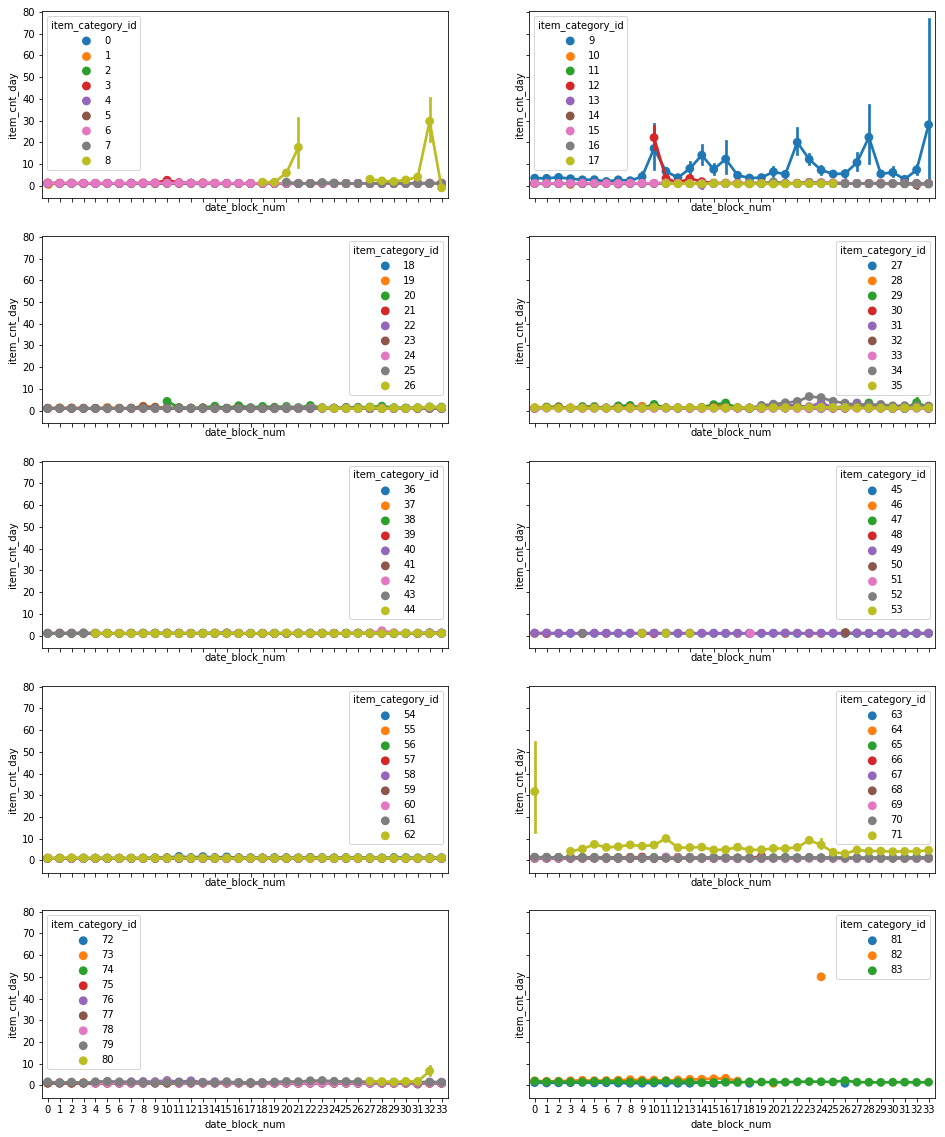

In [38]:
# Display item daily sales for each category for all 34 months in data
fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(16,20))
num_graph = 10
id_per_graph = ceil(train.item_category_id.max() / num_graph)
count = 0
for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='item_category_id', 
                      data=train[np.logical_and(count*id_per_graph <= train['item_category_id'], train['item_category_id'] < (count+1)*id_per_graph)], 
                      ax=axes[i][j])
        count += 1

#### Stationarity

Next, we will use the Augmented Dicky Fuller Test (ADF) to test the stationarity of our data. Stationarity would illustrate if our sales data varies or remain constant over time with regards to the mean and standard deviation. If our data has stationarity, modeling would be easier as most statistical modeling methods assume or require the time series to be stationary. 

In [39]:
# Stationarity tests
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
def test_stationarity(timeseries):
    '''Perform Dickey-Fuller test for stationarity'''
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                -2.40
p-value                        0.14
#Lags Used                     0.00
Number of Observations Used   33.00
Critical Value (1%)           -3.65
Critical Value (5%)           -2.95
Critical Value (10%)          -2.62
dtype: float64


/Users/kaizen/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Our P-value here is out of the accepted range so we will reformat our sales data via `de-seasonalization` 

[]

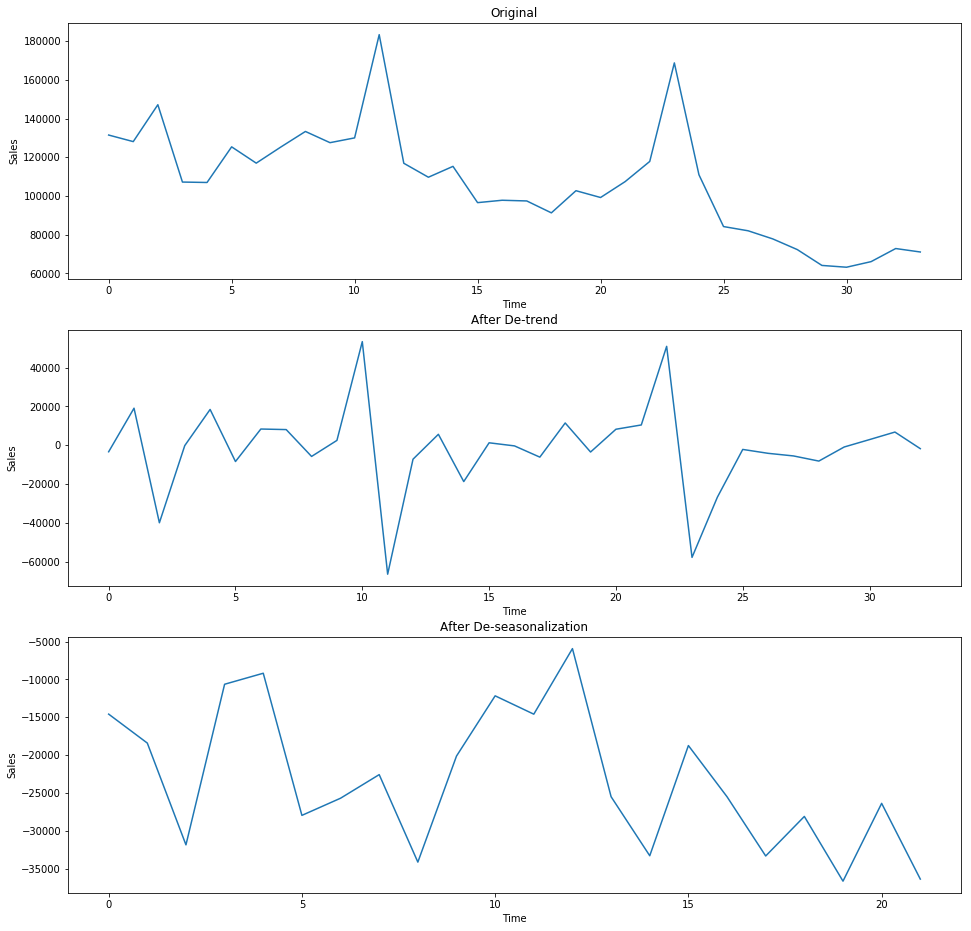

In [40]:
# Remove seasonal trend
from pandas import Series as Series
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced forecast
def inverse_difference(last_ob, value):
    return value + last_ob

# Plot total sales as original, after de-trending, and after de-seasonalization
ts=sales2.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts=difference(ts,12)       # assuming the seasonality is 12 months long
plt.plot(new_ts)
plt.plot()

In [41]:
# Rerun our stationarity test after de-seasonality 
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                -3.27
p-value                        0.02
#Lags Used                     0.00
Number of Observations Used   21.00
Critical Value (1%)           -3.79
Critical Value (5%)           -3.01
Critical Value (10%)          -2.65
dtype: float64


### Conclusions
In addition to our newly-acquired EDA insights from above such as the heavily skewed raw data, the overall decreasing trend in sales, and the yearly seasonal cyclical pattern, we can now also assume our sales training data has stationarity and proceed with standard statistical modeling methods and training for forecasting since our p-value is well within 5% this time. 

After researching various resources including Kaggle kernels, Github repositories, and various blogs including `luliu31415926/kaggle_1c_company_predict_sales` who ranked 6th on Kaggle's public leaderboard and the winner of a similar competition `entron/entity-embedding-rossmann,` we will now attempt to solve our prediction problem via an embedding neural network since multiple research findings indicate that it is the best single model including evidence from studying the winning solution of a similar Kaggle competition called `Rossman Sales` from entron's Github. 